# Intro to Python: Data Analysis
Part of the workshop series presented by the [IDEA Student Center at UC San Diego](http://www.jacobsschool.ucsd.edu/student/).

### Goals
Learn the basics of Python (the programming language) for data analysis:
- loading data from a file
- plotting
- vectorized calculations

### Requirements
- numpy = for loading data and vectorized calculations
- matplotlib = for plotting

In [ ]:
# make the code compatible with both Python 2 and 3
from __future__ import print_function, division

## 1) Loading packages
Python is a general purpose language, which means it can be used for
a wide variety of problems. However, that also means it is not set up
automatically for engineering tasks (i.e. it's more like C/C++ than Matlab). Fortunately, Python has a great community and a large number
of third-party packages have been created to allow users to solve engineering problems with Python (instead of Matlab). The two packages we'll focus on (which will help recreate most Matlab functionality) are:
- [NumPy](http://www.numpy.org/)
- [Matplotlib](http://matplotlib.org/)

But first, we need to load these packages.

In [ ]:
# to load a package in Python (assuming it's installed), use the built-in
# ``import`` command

# load NumPy
import numpy

# check the version of numpy
print( numpy.__version__ )

1.14.3


The numpy package has a lot of built-in code for performing common math-related programming tasks. Let's try a few out:

In [ ]:
# the value of pi
print( numpy.pi )

3.141592653589793


In [ ]:
# cosine function
print( numpy.cos(0) )

1.0


In [ ]:
# create a vector of ones
print( numpy.ones(5) )

[1. 1. 1. 1. 1.]


At this point, you may already be tired of typing ``numpy`` over and over. Well, you're not the only one. Which is why Python's ``import`` command has extra options, including the ability to assign an alias for a package name.

In [ ]:
# load the numpy package, but refer to it by the alias ``np``
import numpy as np

# now whenever you type ``np``, Python knows you mean ``numpy``

# check the numpy version
print( np.__version__ )

# the value of pi
print( np.pi )

# sin(pi / 2)
print( np.sin(np.pi / 2.0) )

# Aaaawwww, so much nicer ^__^

1.14.3
3.141592653589793
1.0


## 2) Plotting data
Now let's try plotting something. First we'll load the plotting package (matplotlib) and then we'll plot some sample data.

In [ ]:
# load a plotting library
import matplotlib.pyplot as plt

# make figures show up inside the notebook (instead of in
# a separate window)
%matplotlib inline

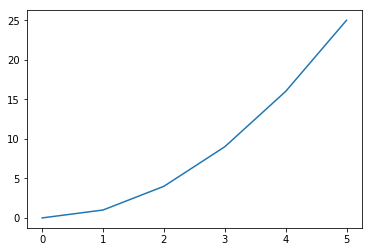

In [ ]:
# a simple line plot

# create some "fake" data
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

# plot the data
plt.plot(x, y)

# show the plot
plt.show()

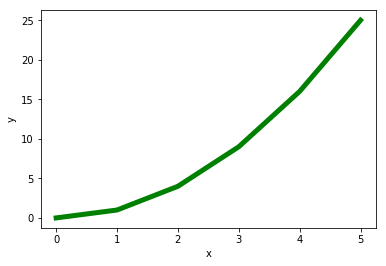

In [ ]:
# let's do that again, but this time we'll try to make the plot look a
# bit more professional by changing the colors, line thicknesses, etc.

# create some "fake" data
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

# plot the data
plt.plot(x, y, color='green', linewidth=5.0)

# add a label to the x-axis
plt.xlabel('x')

# add a label to the y-axis
plt.ylabel('y')

# show the plot
plt.show()

# try to further improve the plot:
# - try other built-in colors (red, blue, green, etc.)
# - or try using a custom color using HEX codes (e.g. "#16a9c7" is a blue-ish color)
# - change the range of values shown on the y-axis with ``plt.ylim([y_min, y_max])``
# - change the linestyle of the plot with ``linestyle='--'`` (dashed) or ``linestyle=':'`` (dotted)
# - change the fontsize of the x-axis label with ``plt.xlabel('x', fontsize=18)``
#
# is there anything else you want to try changing?
#

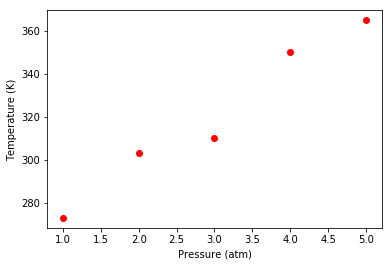

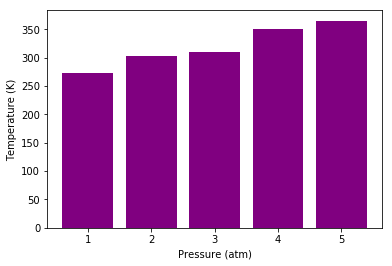

In [ ]:
# matplotlib has other plot types built-in

# create some random data
# - pressure [atm]
# - temperature [K]
pressure = [1, 2, 3, 4, 5]
temperature = [273, 303, 310, 350, 365]

# example: scatter plot
plt.scatter(pressure, temperature, color= 'red')
plt.xlabel('Pressure (atm)')
plt.ylabel('Temperature (K)')
plt.show()

# example: bar plot
plt.bar(pressure, temperature, color='purple')
plt.xlabel('Pressure (atm)')
plt.ylabel('Temperature (K)')
plt.show()

# NOTE: each plot type has its own set of possible customizations, but
# there is overlap between them (e.g. you can change the color of the bar plot
# with ``color='red'``)
#

## 3) Loading data files
Now that we can load packages and plot, let's try working with some data.

### 3.1) Ice cream sales vs shark attacks
Let's compare data on ice cream sales and shark attacks.

In [ ]:
# to make things simple, we're going to use numpy to load the data

# load the data file
# - first column = number of ice cream sales
# - second column = number of shark attacks
#
data = np.genfromtxt('ice_cream_vs_shark_attacks.csv',
                     # columns are separate by commas (csv = comma separated values)
                     delimiter=',',
                     
                     # the first row of the file is the column names
                     # (i.e. the first row isn't data and so we can skip it)
                     skip_header=1)

# as a one liner
#data = np.genfromtxt('ice_cream_vs_shark_attacks.csv', delimiter=',', skip_header=1)

In [ ]:
# view the data
print( data )

[[30.  1.]
 [33.  2.]
 [43.  4.]
 [58.  8.]
 [63.  6.]
 [79.  9.]
 [79. 11.]
 [90. 14.]
 [92. 16.]
 [93. 17.]
 [96. 21.]
 [98. 19.]]


In [ ]:
# check the length of the data
print( len(data) )

12


In [ ]:
# NOTE: numpy has a built-in parameter to see the dimensions of
# the array (very useful is you're working with 2D, 3D, etc. data)
print( data.shape )

(12, 2)


In [ ]:
# check the type used to store the data
print( type(data) )

<class 'numpy.ndarray'>


In [ ]:
# to make things easier, we're going to split the data into
# two variables

# select all rows, but only the first column (column 0)
ice_cream = data[:, 0]

# select all rows, but only the second column (column 1)
shark_attacks = data[:, 1]

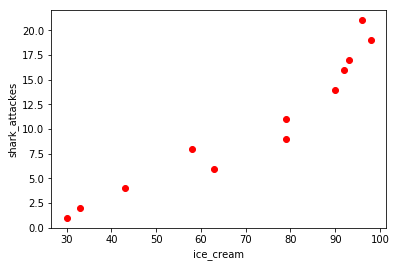

In [ ]:
# create a quick plot of the data

# let's do a scatter plot
plt.scatter(ice_cream, shark_attacks, color='red')

# add labels to the x and y axes
plt.xlabel('ice_cream')
plt.ylabel('shark_attackes')

# show the plot
plt.show()

**Question**: Does this mean ice cream makes people delicious to shark attacks? Or that shark attacks cause you have a craving for Ben & Jerry's?

### 3.2) Lab data
Now let's try a more realistic example to what you would do in an engineering lab class.

In [ ]:
# First, we'll load a data file that has the results from an experiment

# consumption rate of oxygen during combustion
#
# load experimental data from a file (2 columns)
# - column 0 = temperature [K]
# - column 1 = consumption rate [moles/(s * m^2)]
#
data = np.genfromtxt('combustion.csv', delimiter=',', skip_header=1)

# temperature [K]
T = data[:, 0]

# consumption rate (J) [moles/(s * m^2)]
J = data[:, 1]

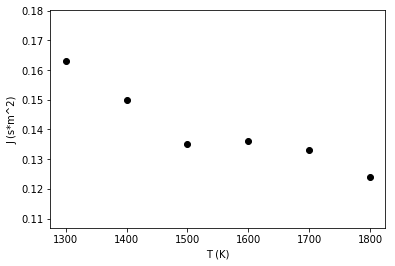

In [ ]:
# Plot the temperature vs consumption rate of oxygen

# use scatter plot since these are data points from an 
# experiment
plt.scatter(T, J, color='black')

# add labels
plt.xlabel('T (K)')
plt.ylabel('J (s*m^2)')

# show the plot
plt.show()

Now let's compare the experimental results (the data we just loaded and plotted) to a theoretical model.

**NOTE**: due to time constraints, we will only compare the theoretical and experimental results visually. In a real scenario, you should use statistical metrics to determine how well the theory and data agree.

The consumption rate of oxygen for this experimental setup is described
by the following equation:

$$
J = c D_{12} \frac{1}{r_0} ,
$$

where $D_{12}$ = 1.71E-4 [m$^2$/s], $r_0$ = 0.001 [m] (i.e. 1 mm), and $c$ [mol/m$^3$] is calculated as:

$$
c = \frac{p}{R T} ,
$$
where $p$ is the pressure (10135.0 [Pa]), $R$ = 8.314 J/(K * mol), and $T$ [K] is the temperature.

In [ ]:
# knowns:
# - p = 10135.0 Pa
# - R = 8.314 J/(K*mol)
# - r0 = 0.001 m
# - D12 = 1.71E-4 m^2/s

# need to calculate:
# - c in [moles/m^3] for a range of temperatures [K]
# - J in [moles/(m^2 * s)]

In [ ]:
# define the knowns as variables:

# pressure [Pa]
p = 10135.0

# ideal gas constant [J/(mol*K)]
R = 8.314

# radius [m]
r0 = 0.001

# mass diffusivity [m^2/s]
D12 = 1.71E-4

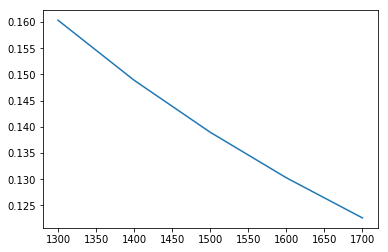

In [ ]:
# calculate c [kmol/m^3] for a range of temperatures [K]

# create a vector of temperatures [K]
#
#   np.arange(min value, max value, step size)
#
T_theory = np.arange(1300, 1800, 100)

# calculate c for the range of temperatures
c = p / (R * T_theory)

# then calculate J for a range of temperatures
# using the equations above
J_theory = c*D12/r0

# check the results with a plot
plt.plot(T_theory, J_theory)
plt.show()

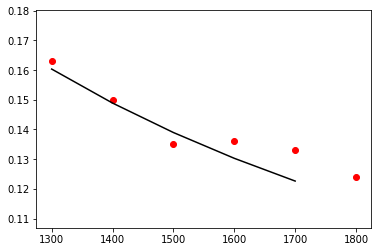

In [ ]:
# now let's plot the theoretical results against the experimental

# plot the experimental results
plt.scatter(T, J, color='red')

# plot the theoretical results
plt.plot(T_theory, J_theory, color='black')

# show the plot
plt.show()


# now that we have a basic plot, try to improve the formatting
# - colors
# - line styles and thicknesses
# - text labels
# - font sizes
#